팬시 인덱싱

단일 스칼라 대신 인덱스 배열을 전달한다 ==> 복잡한 배열 값의 하위 집합에 빠르게 접근 가능함

In [1]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

Init signature: np.random.RandomState(self, /, *args, **kwargs)
Docstring:     
RandomState(seed=None)

Container for the Mersenne Twister pseudo-random number generator.

`RandomState` exposes a number of methods for generating random numbers
drawn from a variety of probability distributions. In addition to the
distribution-specific arguments, each method takes a keyword argument
`size` that defaults to ``None``. If `size` is ``None``, then a single
value is generated and returned. If `size` is an integer, then a 1-D
array filled with generated values is returned. If `size` is a tuple,
then an array with that shape is filled and returned.

*Compatibility Guarantee*
A fixed seed and a fixed series of calls to 'RandomState' methods using
the same parameters will always produce the same results up to roundoff
error except when the values were incorrect. Incorrect values will be
fixed and the NumPy version in which the fix was made will be noted in
the relevant docstring. Extension of existing parameter ranges and the
addition of new parameters is allowed as long the previous behavior
remains unchanged.

Parameters
----------
seed : {None, int, array_like}, optional
    Random seed used to initialize the pseudo-random number generator.  Can
    be any integer between 0 and 2**32 - 1 inclusive, an array (or other
    sequence) of such integers, or ``None`` (the default).  If `seed` is
    ``None``, then `RandomState` will try to read data from
    ``/dev/urandom`` (or the Windows analogue) if available or seed from
    the clock otherwise.

Notes
-----
The Python stdlib module "random" also contains a Mersenne Twister
pseudo-random number generator with a number of methods that are similar
to the ones available in `RandomState`. `RandomState`, besides being
NumPy-aware, has the advantage that it provides a much larger number
of probability distributions to choose from.
File:           c:\users\jsong\anaconda3\lib\site-packages\numpy\random\mtrand.cp36-win_amd64.pyd
Type:           type

In [5]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [6]:
ind = [3,7,2]
x[ind]

array([71, 86, 14])

팬시 인덱싱을 사용하면 인덱싱 대상을 나타내는 것이 아니라 인덱스된 배열 자체를 나타냄

In [7]:
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [8]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
row = np.array([0,1,2]) # X[0,1], X[1,1], X[2,3] 을 인텍싱 한 것과 같다
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

팬시 인텍싱은 브로드캐스팅을 그대로 따른다

In [10]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [11]:
row[:, np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

결합인덱싱(팬시 인덱싱과 기본 인덱싱을 결합하여 더욱 강력한 인덱싱 가능)

In [13]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
X[2, [2,0,1]]

array([10,  8,  9])

In [15]:
X[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [16]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

예제: 임의의 점 선택하기

In [17]:
mean = [0,0]
cov = [[1,2],
      [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

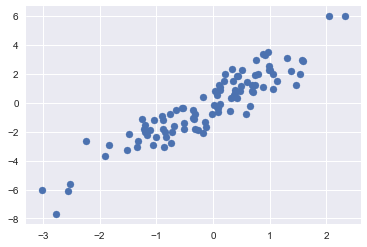

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 플롯 스타일 설정
plt.scatter(X[:, 0], X[:, 1]);

In [22]:
# 팬시 인덱싱을 통하여 임의의 점 20개를 선택하자
# 우선 반복 없이임의로 인텍스를 20개 선택하고 그 인덱스를 사용해 원본 배열의 일부를 선택한다

indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([89,  3, 98, 24, 44, 93, 20, 70, 34,  6, 19, 91, 62, 77,  7, 28, 68,
       76, 83, 18])

In [23]:
selection = X[indices] # 팬시 인덱싱 사용함
selection

array([[ 0.51575983,  2.30284639],
       [ 2.04998983,  5.97778598],
       [-0.99658689, -2.35038099],
       [ 0.4299908 ,  0.36324254],
       [-1.06505097, -2.88726779],
       [-0.83504984, -2.38632016],
       [ 1.58115602,  2.86410319],
       [-1.16586444, -2.24482237],
       [ 0.91181024,  3.32968944],
       [ 1.46860232,  1.22961093],
       [-0.50886808, -1.81099656],
       [-0.16863279,  0.39422355],
       [ 0.10259314,  1.24690575],
       [ 0.30414557, -0.5828419 ],
       [ 0.35282131,  1.49875397],
       [-0.88473953, -1.81495444],
       [ 0.69758045,  0.72563649],
       [-0.53334959, -0.37039911],
       [ 0.74577693,  1.95834451],
       [ 1.53817376,  1.99973464]])

In [24]:
selection.shape

(20, 2)

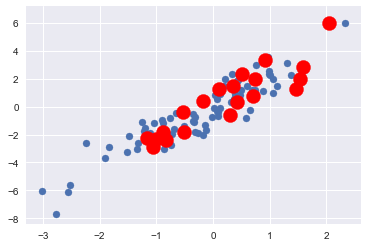

In [33]:
# 어떤 점이 사용 되었는지 큰 동그라미로 표현하자

plt.scatter(X[:, 0], X[:, 1], alpha=1.0)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red', s=200);

팬시 인덱싱으로 값 표현하기

In [35]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [36]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [37]:
x = np.zeros(10)
x[[0,0]] = [4,6] # x[0]에 4가 먼저 할당 그러나 x[0]에 6이 다시 할당 따라서 4는 사라지고...
x

array([ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [38]:
i = [2,3,3,4,4,4]
x[i] += 1 # 해당 인덱스에 1을 더하라는 뜻
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

연산이 반복되는 곳에서 다른 실행을 원한다면? 

유니버셜 함수의 at() 메서드를 쓰면 된다

In [39]:
x = np.zeros(10)
i = [2,3,3,4,4,4]
np.add.at(x, i, 1) # 지정한 값 1을 해당 인덱스(i)에 해당연산자(add)를 인덱싱 된 수 만큼 반복
x

array([ 0.,  0.,  1.,  2.,  3.,  0.,  0.,  0.,  0.,  0.])

at(a, indices, b=None)

Performs unbuffered in place operation on operand 'a' for elements
specified by 'indices'. For addition ufunc, this method is equivalent to
`a[indices] += b`, except that results are accumulated for elements that
are indexed more than once. For example, `a[[0,0]] += 1` will only
increment the first element once because of buffering, whereas
`add.at(a, [0,0], 1)` will increment the first element twice.

.. versionadded:: 1.8.0

Parameters
----------
a : array_like
    The array to perform in place operation on.
indices : array_like or tuple
    Array like index object or slice object for indexing into first
    operand. If first operand has multiple dimensions, indices can be a
    tuple of array like index objects or slice objects.
b : array_like
    Second operand for ufuncs requiring two operands. Operand must be
    broadcastable over first operand after indexing or slicing.

Examples
--------
Set items 0 and 1 to their negative values:

>>> a = np.array([1, 2, 3, 4])
>>> np.negative.at(a, [0, 1])
>>> print(a)
array([-1, -2, 3, 4])

::

Increment items 0 and 1, and increment item 2 twice:

>>> a = np.array([1, 2, 3, 4])
>>> np.add.at(a, [0, 1, 2, 2], 1)
>>> print(a)
array([2, 3, 5, 4])

::

Add items 0 and 1 in first array to second array,
and store results in first array:

>>> a = np.array([1, 2, 3, 4])
>>> b = np.array([1, 2])
>>> np.add.at(a, [0, 1], b)
>>> print(a)
array([2, 4, 3, 4])
Type:      builtin_function_or_method

예제: 데이터 구간화 

at()를 쓰면 데이터를 구간화 하여 히스토그램을 만들 수 있다
즉 값들이 구간내에 속한 위치를 빨리 파악할 수 있다

In [40]:
np.random.seed(42)
x = np.random.randn(100)

# 직접 히스토그램 계산하기

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 각 x에 대한 적절한 구간 찾기

i = np.searchsorted(bins, x)

# 각 구간에 1 더하기

np.add.at(counts, i, 1)


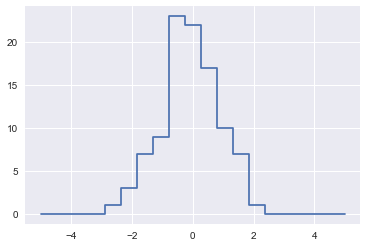

In [41]:
plt.plot(bins, counts, linestyle='steps');